<a href="https://colab.research.google.com/github/a33211/Data-science-homeworks/blob/main/Hw2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Частина друга: Аналіз файлів
Необхідно виконати:

- Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
- Прочитайте отриману таблицю, використовуючи метод head
- Визначте розмір таблиці за допомогою методу shape
- Визначте типи всіх стовпців за допомогою dataframe.dtypes
- Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
- Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
- Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
- Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
- Визначте новий розмір таблиці за допомогою методу shape
- Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
- Визначте розмір таблиці python_data за допомогою методу shape
- Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"
- Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
- Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"
- Створіть описову статистику за допомогою методу describe для нового стовпчика.
Збережіть отриману таблицю в CSV файл

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import seaborn as sns


In [7]:
#Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
#Прочитайте отриману таблицю, використовуючи метод head
df = pd.read_csv('2017_jun_final.csv')
df

,N,Должность,Язык.программирования,Специализация,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,...,Еще.студент,Уровень.английского,Предметная.область,Дата.заполнения,User.Agent,exp,current_job_exp,salary,Валюта,cls
0,1,Junior QA engineer,NaN,Manual QA,0.5,0.5,400,0,Харьков,до 10 человек,...,True,ниже среднего,"iOS,eCommerce",12/06/2017 12:38:08,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,QA
1,2,Junior QA engineer,NaN,Manual QA,меньше 3 месяцев,меньше 3 месяцев,430,130,Харьков,свыше 1000 человек,...,True,выше среднего,Веб-разработка,12/06/2017 12:42:51,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,0.0,0.0,430,NaN,QA
2,3,Software Engineer,C#/.NET,NaN,4,1,2500,800,Киев,до 1000 человек,...,False,средний,"Веб-разработка,Корпоративные системы",12/06/2017 13:02:47,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,4.0,1.0,2500,NaN,DEV
3,4,Software Engineer,JavaScript,NaN,5,4,2000,400,Одесса,до 200 человек,...,False,ниже среднего,"Desktop Applications,Веб-разработка",12/06/2017 13:03:01,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,5.0,4.0,2000,NaN,DEV
4,5,Senior Software Engineer,JavaScript,NaN,10 и более лет,0.5,4500,500,Другой,до 10 человек,...,False,средний,"Desktop Applications,Веб-разработка",12/06/2017 13:03:47,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_2 like...,10.0,0.5,4500,NaN,DEV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,8700,QA engineer,NaN,Manual QA,1,меньше 3 месяцев,700,700,Одесса,до 50 человек,...,False,средний,"Android,Desktop Applications",12/07/2017 15:45:24,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:54....,1.0,0.0,700,NaN,QA
8700,8701,Marketing,NaN,NaN,0.5,0.5,400,120,Киев,до 50 человек,...,False,ниже среднего,eCommerce,12/07/2017 17:00:06,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,0.5,0.5,400,NaN,NaN
8701,8702,Junior Software Engineer,Ruby/Rails,NaN,1,0.5,800,500,Львов,до 10 человек,...,False,выше среднего,"Веб-разработка,Корпоративные системы",12/07/2017 17:32:26,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,1.0,0.5,800,NaN,DEV
8702,8703,Team lead,NaN,NaN,6,4,2600,0,Днепр,свыше 1000 человек,...,False,продвинутый,Финансы и банки,12/07/2017 18:14:59,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,6.0,4.0,2600,NaN,PM


<function matplotlib.pyplot.show(close=None, block=None)>

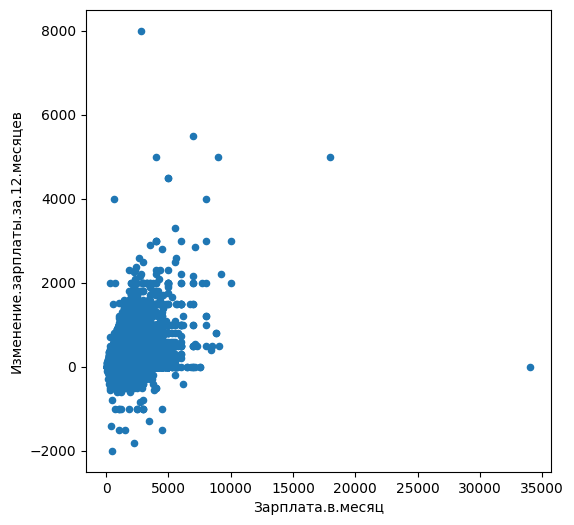

In [8]:
df.plot(x = 'Зарплата.в.месяц', y = 'Изменение.зарплаты.за.12.месяцев', kind = 'scatter', figsize = (6,6))
plt.show

<Figure size 800x640 with 0 Axes>

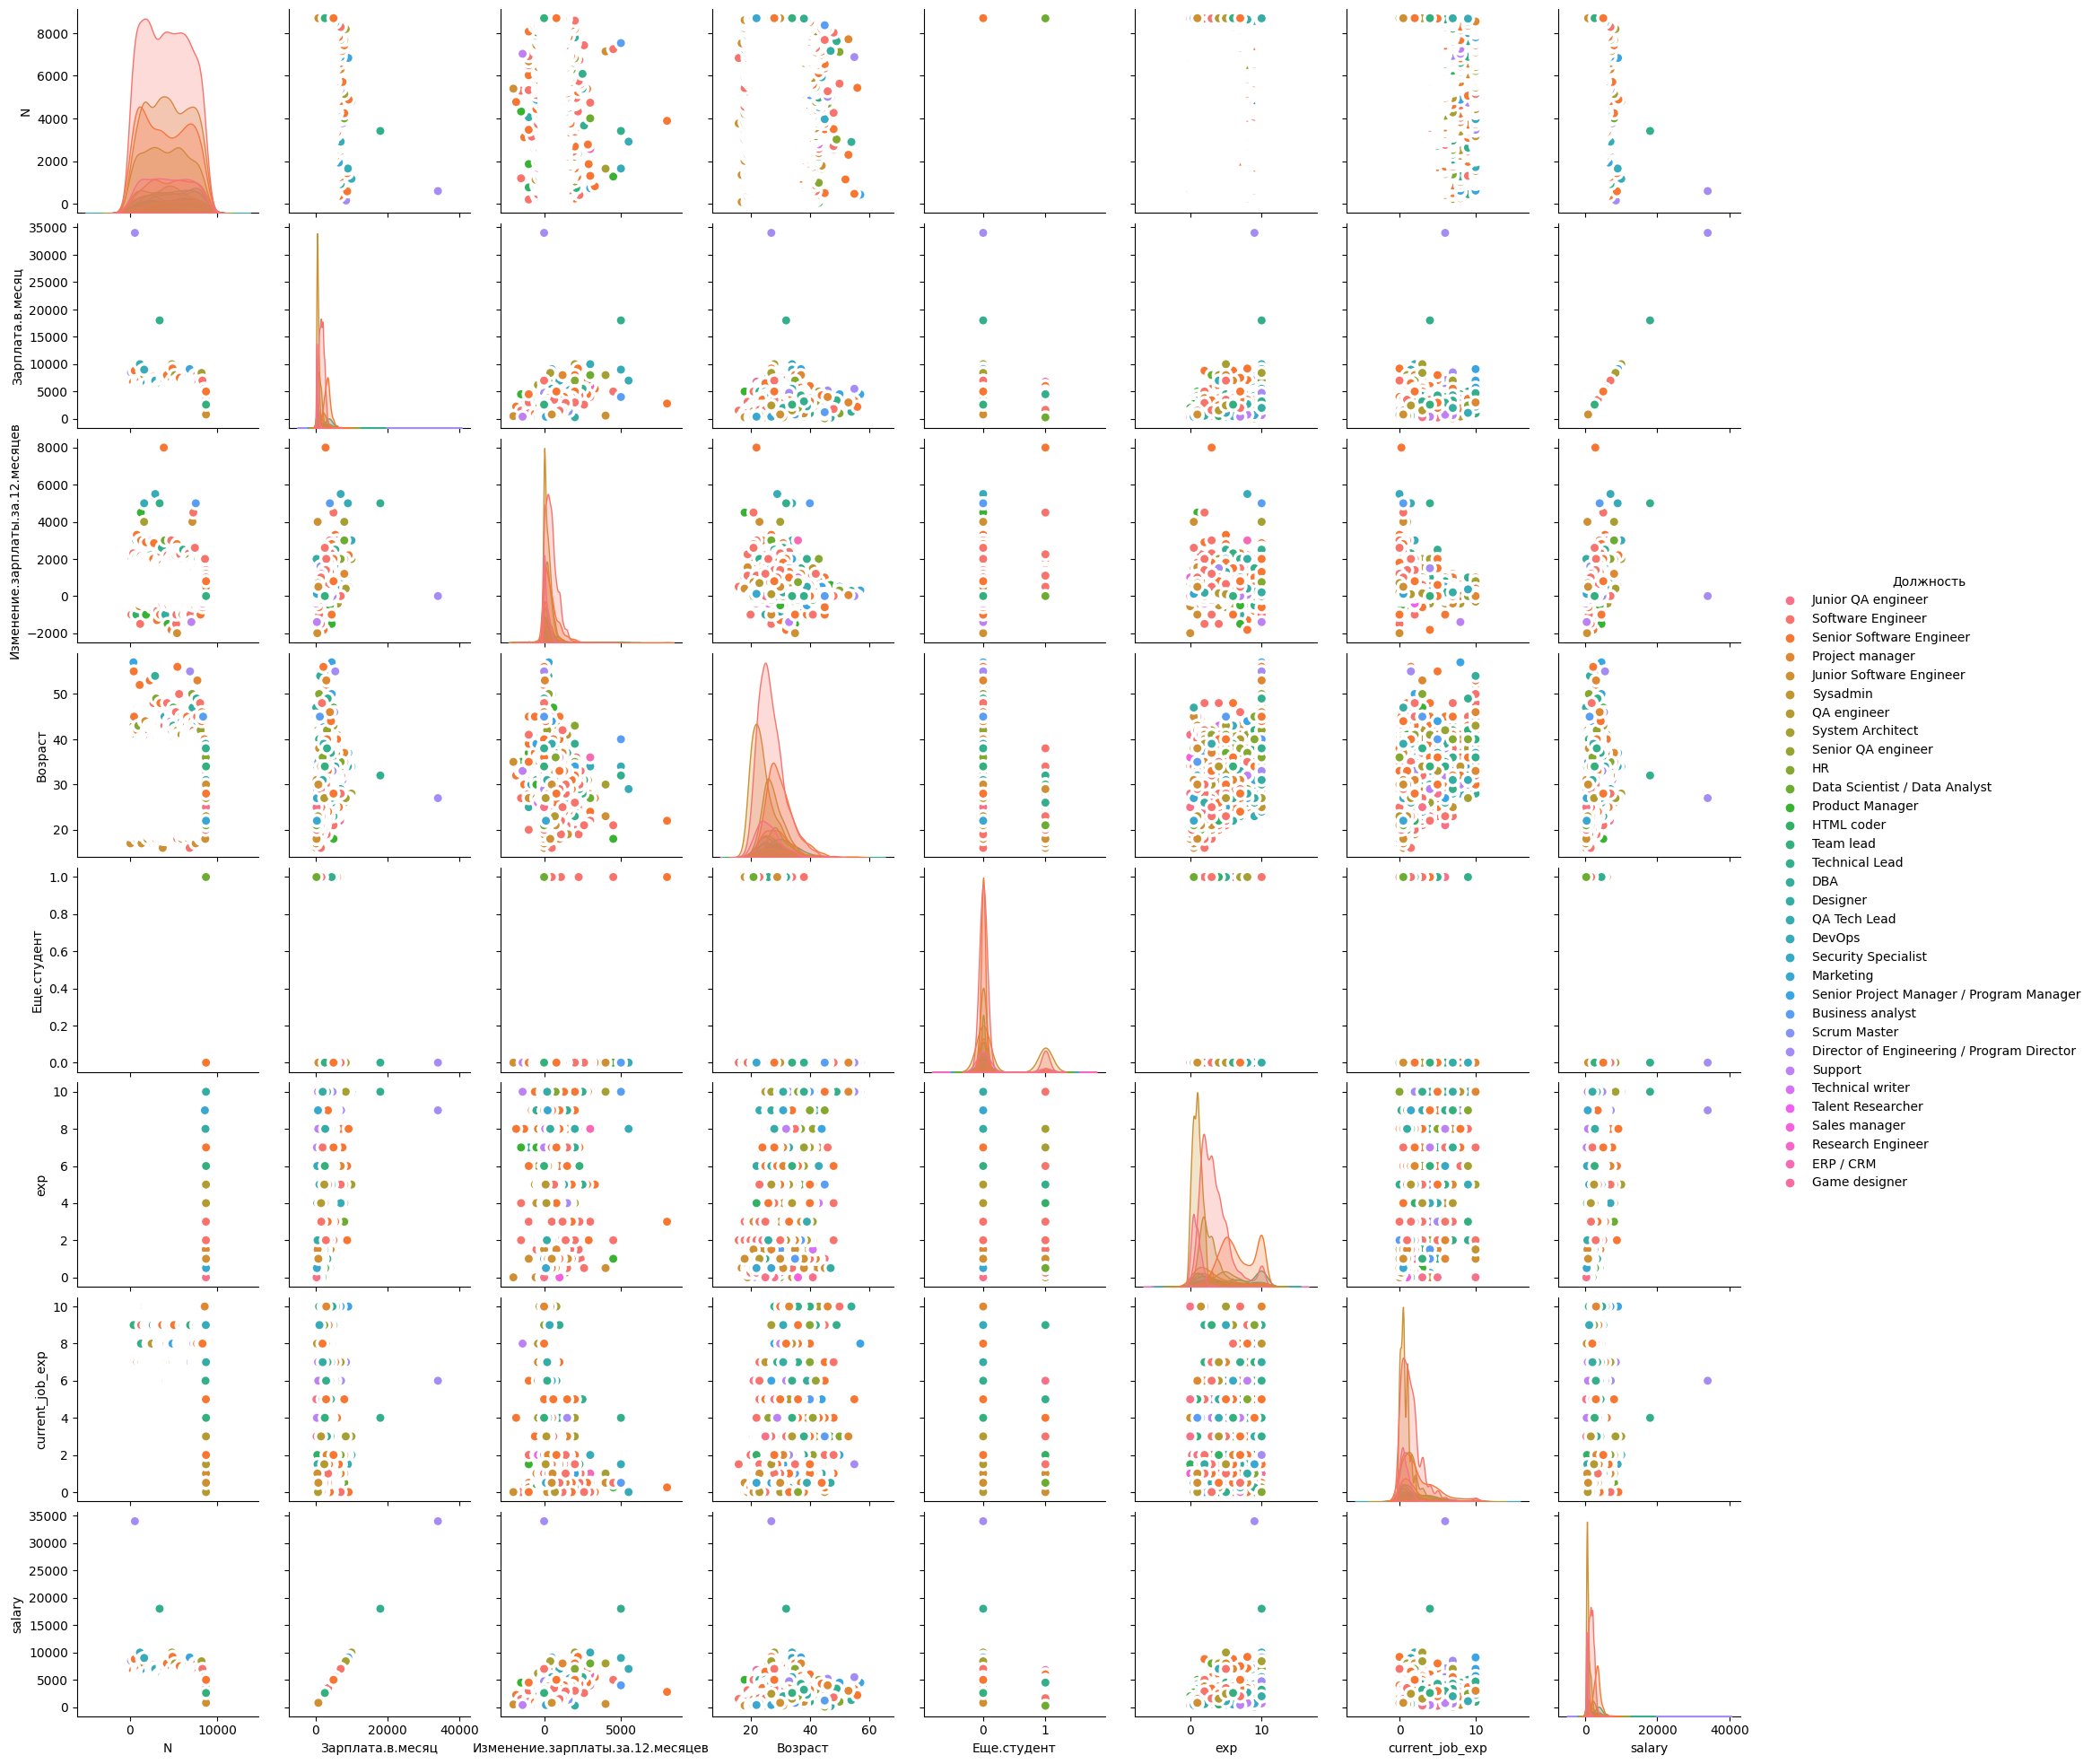

In [9]:
x = df['Зарплата.в.месяц']
y = df['Опыт.работы.на.текущем.месте']
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="Должность", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [10]:
#Визначте розмір таблиці за допомогою методу shape
df.shape

(8704, 25)

In [11]:
#Визначте типи всіх стовпців за допомогою dataframe.dtypes
df.dtypes

N                                     int64
Должность                            object
Язык.программирования                object
Специализация                        object
Общий.опыт.работы                    object
Опыт.работы.на.текущем.месте         object
Зарплата.в.месяц                      int64
Изменение.зарплаты.за.12.месяцев      int64
Город                                object
Размер.компании                      object
Тип.компании                         object
Пол                                  object
Возраст                               int64
Образование                          object
Университет                          object
Еще.студент                            bool
Уровень.английского                  object
Предметная.область                   object
Дата.заполнения                      object
User.Agent                           object
exp                                 float64
current_job_exp                     float64
salary                          

In [12]:
#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
print(df.isnull().sum()* 100 / len(df))

N                                    0.000000
Должность                            0.000000
Язык.программирования               44.232537
Специализация                       82.938879
Общий.опыт.работы                    0.000000
Опыт.работы.на.текущем.месте         0.000000
Зарплата.в.месяц                     0.000000
Изменение.зарплаты.за.12.месяцев     0.000000
Город                                0.000000
Размер.компании                      0.000000
Тип.компании                         0.000000
Пол                                  0.000000
Возраст                              0.000000
Образование                          0.000000
Университет                          4.113051
Еще.студент                          0.000000
Уровень.английского                  0.000000
Предметная.область                   2.562040
Дата.заполнения                      0.000000
User.Agent                           0.000000
exp                                  0.000000
current_job_exp                   

In [13]:
#Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
df_hollowed = df.loc[:, df.columns != 'Мова програмування'].dropna(axis = 1)
df_hollowed.insert(2,'new Мова програмування',df['Язык.программирования'])
df_hollowed.shape

(8704, 20)

In [14]:
#Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
df_hollowed.isna()

,N,Должность,new Мова програмування,Общий.опыт.работы,Опыт.работы.на.текущем.месте,Зарплата.в.месяц,Изменение.зарплаты.за.12.месяцев,Город,Размер.компании,Тип.компании,Пол,Возраст,Образование,Еще.студент,Уровень.английского,Дата.заполнения,User.Agent,exp,current_job_exp,salary
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8700,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8701,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8702,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
#Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
#Визначте новий розмір таблиці за допомогою методу shape
df_hollowed_by_row = df.dropna()
print(df.shape)
print(df_hollowed_by_row.shape)

(8704, 25)
(0, 25)


In [16]:
#Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
#Визначте розмір таблиці python_data за допомогою методу shape
value = 'Python'
#df['Язык.программирования']
#python_data = df.query("Язык.программирования == Python")
python_data = df.loc[df['Язык.программирования'] == 'Python']
print(python_data['Язык.программирования'])
print('__________\n', python_data.shape)

12      Python
68      Python
87      Python
114     Python
143     Python
         ...  
8546    Python
8625    Python
8635    Python
8673    Python
8695    Python
Name: Язык.программирования, Length: 207, dtype: object
__________
 (207, 25)


In [17]:
#Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"
df_grouped = df.groupby('Должность') 
#print(df_grouped.nunique())
print(df_grouped.ngroups)
print(df_grouped.size())

32
Должность
Business analyst                               150
DBA                                             26
Data Scientist / Data Analyst                   79
Designer                                       223
DevOps                                         170
Director of Engineering / Program Director      44
ERP / CRM                                       12
Game designer                                   18
HR                                             247
HTML coder                                     156
Junior QA engineer                             404
Junior Software Engineer                      1280
Marketing                                      138
Product Manager                                 87
Project manager                                371
QA Tech Lead                                    79
QA engineer                                    738
Research Engineer                               14
Sales manager                                   85
Scrum Master      

In [18]:
#Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg 
#і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
df_grouped_2 = df.groupby(by=['Должность'],as_index=False).agg({'Зарплата.в.месяц':['count','mean','max','min']})
df_grouped_2

Должность Зарплата.в.месяц               \
                                                          count         mean   
0                             Business analyst              150  1551.500000   
1                                          DBA               26  1653.269231   
2                Data Scientist / Data Analyst               79  1544.240506   
3                                     Designer              223  1134.161435   
4                                       DevOps              170  2162.688235   
5   Director of Engineering / Program Director               44  5066.363636   
6                                    ERP / CRM               12  1370.833333   
7                                Game designer               18  1455.277778   
8                                           HR              247   850.283401   
9                                   HTML coder              156   550.993590   
10                          Junior QA engineer              404   482.774752   
11                    Junior Software Engineer             1280   605.658594   
12                                   Marketing              138   861.282609   
13                             Product Manager               87  2054.471264   
14                             Project manager              371  1512.846361   
15                                QA Tech Lead               79  2684.430380   
16                                 QA engineer              738  1176.704607   
17                           Research Engineer               14  1099.000000   
18                               Sales manager               85   635.847059   
19                                Scrum Master               19  2355.684211   
20                         Security Specialist               12  1783.250000   
21    Senior Project Manager / Program Manager               66  3562.181818   
22                          Senior QA engineer              263  2385.536122   
23                    Senior Software Engineer             1080  3243.200926   
24                           Software Engineer             2168  1678.630074   
25                                     Support              115   817.339130   
26                                    Sysadmin              129   773.542636   
27                            System Architect               65  4387.076923   
28                           Talent Researcher               36   550.555556   
29                                   Team lead              152  2836.328947   
30                              Technical Lead              250  3664.272000   
31                            Technical writer               28  1127.892857   

                 
      max   min  
0    5000   200  
1    6000   380  
2    8000   150  
3    4000   100  
4   10000   194  
5   34000  1500  
6    6000   100  
7    6800   150  
8    7000   100  
9    3000   154  
10   2000    96  
11   2600    75  
12   4000   100  
13   5000   250  
14   8000   190  
15   6000   430  
16   2900   150  
17   4000   114  
18   2300   120  
19   4500   370  
20   4000   300  
21   9100   200  
22   6000   400  
23   9200   350  
24   7000   100  
25   3650   138  
26   3000    90  
27  10000   400  
28   1700   100  
29   7000   300  
30  18000   500  
31   3000   200

In [19]:
#Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"
df1 = df.iloc[:,[1,6]]
def average_sal():
  df1['avg'] = df1['Зарплата.в.месяц'].astype(float).mean()
  return df1['avg']
df1 = df1.append(average_sal())
df1.iloc[:,[0,1,2]]

<ipython-input-19-76397a4504f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['avg'] = df1['Зарплата.в.месяц'].astype(float).mean()
<ipython-input-19-76397a4504f6>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(average_sal())


,Должность,Зарплата.в.месяц,avg
0,Junior QA engineer,400.0,1666.704159
1,Junior QA engineer,430.0,1666.704159
2,Software Engineer,2500.0,1666.704159
3,Software Engineer,2000.0,1666.704159
4,Senior Software Engineer,4500.0,1666.704159
...,...,...,...
8700,Marketing,400.0,1666.704159
8701,Junior Software Engineer,800.0,1666.704159
8702,Team lead,2600.0,1666.704159
8703,Senior Software Engineer,5000.0,1666.704159
